In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [113]:
df = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv')

In [114]:
display(df.head())
df.dtypes

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,0,625,3,2013-11-06,641,1,1,0,0,7293
1,1,293,2,2013-07-16,877,1,1,0,1,7060
2,2,39,4,2014-01-23,561,1,1,0,0,4565
3,3,676,4,2013-09-26,1584,1,1,0,0,6380
4,4,709,3,2014-01-22,1477,1,1,0,0,11647


True_index              int64
Store_ID                int64
Day_of_week             int64
Date                   object
Nb_customers_on_day     int64
Open                    int64
Promotion               int64
State_holiday          object
School_holiday          int64
Sales                   int64
dtype: object

#### Store_ID is a nominal (categorical) variable.

We should address it as such, however, there is a large number of different values, so it is a bad idea to One-Hot encode them. We created bins to group stores by the number of sales.

In [115]:
df['Store_ID'].nunique()

1115

<Axes: xlabel='Sales', ylabel='Count'>

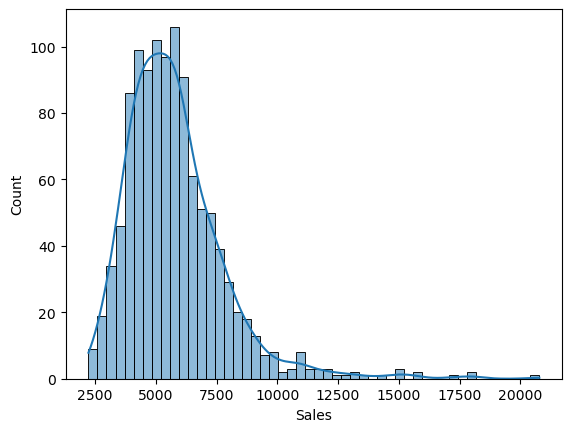

In [116]:
df_stores = df.groupby('Store_ID')['Sales'].mean().reset_index()
sns.histplot(df_stores['Sales'], bins=50, kde=True)

The distribution is far from Normal, it is tailed on the right-side with a few stores having larger number of sales. To account for that, we will group them in separate bins.

In [117]:
df['Store_sales'] = pd.cut(df['Sales'], bins = [0, 3750, 6250, 8750, 12500, 40000], labels = ['low', 'medium', 'moderate', 'high', 'vhigh'])

Now we get dummies for Store_sales column and split into 5 new columns storing boolean values.

In [118]:
store_dummies = pd.get_dummies(df['Store_sales'], dtype = 'bool', prefix='Sales_')
df = pd.concat([df, store_dummies], axis=1)
df.drop(columns='Store_ID', inplace=True)

We have the same approach for the day of the week, split into 7 columns storing boolean values.

In [119]:
df['Day_of_week'].replace({1:'Monday',
                           2:'Tuesday',
                           3:'Wednesday',
                           4:'Thursday',
                           5:'Friday',
                           6:'Saturday',
                           7:'Sunday'},
                           inplace=True)
days_week_dummies = pd.get_dummies(df['Day_of_week'], dtype = 'bool')
df = pd.concat([df, days_week_dummies], axis=1)
df.drop(columns='Day_of_week', inplace=True)

C:\Users\orian\AppData\Local\Temp\ipykernel_56896\2046343609.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Day_of_week'].replace({1:'Monday',


We have the same approach for State holiday, split into 4 columns storing boolean values.

In [120]:
df['State_holiday'].replace({'0':'No_holiday',
                           'a':'Holiday_a',
                           'b':'Holiday_b',
                           'c':'Holiday_c'},
                           inplace=True)
state_holiday_dummies = pd.get_dummies(df['State_holiday'], dtype = 'bool')
df = pd.concat([df, state_holiday_dummies], axis=1)
df.drop(columns='State_holiday', inplace=True)

C:\Users\orian\AppData\Local\Temp\ipykernel_56896\829463760.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['State_holiday'].replace({'0':'No_holiday',


In [122]:
df

,True_index,Date,Nb_customers_on_day,Open,Promotion,School_holiday,Sales,Store_sales,Sales__low,Sales__medium,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Holiday_a,Holiday_b,Holiday_c,No_holiday
0,0,2013-11-06,641,1,1,0,7293,moderate,False,False,...,False,False,False,False,False,True,False,False,False,True
1,1,2013-07-16,877,1,1,1,7060,moderate,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2,2014-01-23,561,1,1,0,4565,medium,False,True,...,False,False,False,True,False,False,False,False,False,True
3,3,2013-09-26,1584,1,1,0,6380,moderate,False,False,...,False,False,False,True,False,False,False,False,False,True
4,4,2014-01-22,1477,1,1,0,11647,high,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640835,712040,2014-09-20,611,1,0,0,4702,medium,False,True,...,False,True,False,False,False,False,False,False,False,True
640836,712041,2015-01-15,1267,1,1,0,12545,vhigh,False,False,...,False,False,False,True,False,False,False,False,False,True
640837,712042,2015-06-20,595,1,0,0,5823,medium,False,True,...,False,True,False,False,False,False,False,False,False,True
640838,712043,2014-08-18,599,1,1,1,7986,moderate,False,False,...,True,False,False,False,False,False,False,False,False,True


### Casting as correct data type

Columns storing boolean valeus should be casted as such:

In [124]:
df['Open'] = df['Open'].astype('bool')
df['Promotion'] = df['Promotion'].astype('bool')
df['School_holiday'] = df['School_holiday'].astype('bool')

Date should be casted as date type:

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

31

Now we can extract Year, month and day from Date column

In [135]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month_name()
df['day'] = df['Date'].dt.day
df.drop(columns='Date', inplace=True)

In [137]:
df

,True_index,Nb_customers_on_day,Open,Promotion,School_holiday,Sales,Store_sales,Sales__low,Sales__medium,Sales__moderate,...,Thursday,Tuesday,Wednesday,Holiday_a,Holiday_b,Holiday_c,No_holiday,year,month,day
0,0,641,True,True,False,7293,moderate,False,False,True,...,False,False,True,False,False,False,True,2013,November,6
1,1,877,True,True,True,7060,moderate,False,False,True,...,False,True,False,False,False,False,True,2013,July,16
2,2,561,True,True,False,4565,medium,False,True,False,...,True,False,False,False,False,False,True,2014,January,23
3,3,1584,True,True,False,6380,moderate,False,False,True,...,True,False,False,False,False,False,True,2013,September,26
4,4,1477,True,True,False,11647,high,False,False,False,...,False,False,True,False,False,False,True,2014,January,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640835,712040,611,True,False,False,4702,medium,False,True,False,...,False,False,False,False,False,False,True,2014,September,20
640836,712041,1267,True,True,False,12545,vhigh,False,False,False,...,True,False,False,False,False,False,True,2015,January,15
640837,712042,595,True,False,False,5823,medium,False,True,False,...,False,False,False,False,False,False,True,2015,June,20
640838,712043,599,True,True,True,7986,moderate,False,False,True,...,False,False,False,False,False,False,True,2014,August,18


In [ ]:
year_dummies = pd.get_dummies(df['year'], dtype = 'bool', prefix = 'year_')
df = pd.concat([df, year_dummies], axis=1)

month      Sales      
April      5744.644090    0.083333
August     5704.107742    0.083333
December   6824.677607    0.083333
February   5641.458899    0.083333
January    5462.037091    0.083333
July       6075.380935    0.083333
June       5779.161259    0.083333
March      5786.661218    0.083333
May        5480.171603    0.083333
November   6016.330969    0.083333
October    5532.108600    0.083333
September  5586.732016    0.083333
Name: proportion, dtype: float64


<Axes: xlabel='month', ylabel='Sales'>

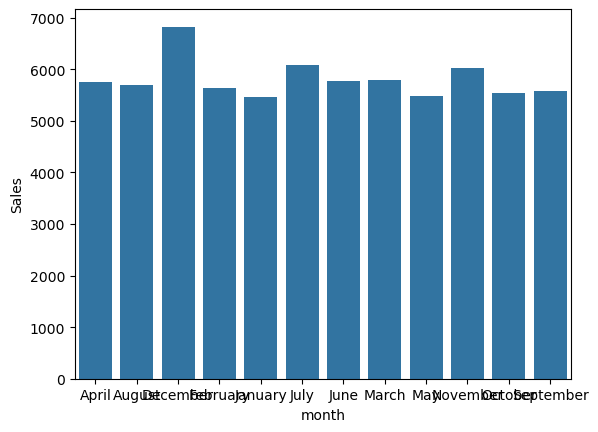

In [ ]:
df_months = df.groupby('month')['Sales'].mean().reset_index()
sns.barplot(data=df_months, x='month', y='Sales')

<Axes: xlabel='Sales', ylabel='Count'>

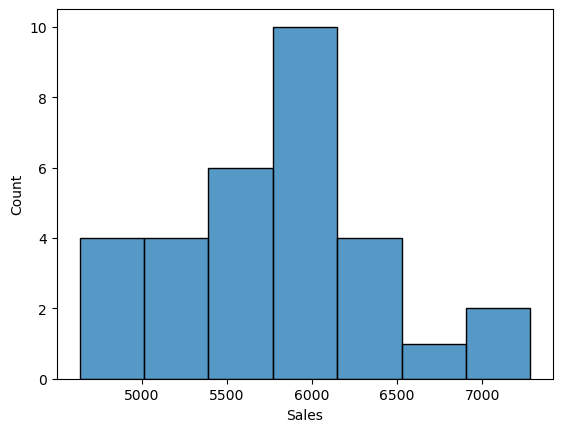

In [ ]:
df_days = df.groupby('day')['Sales'].mean().reset_index()
sns.histplot(df_days['Sales'])
df['Store_sales'] = pd.cut(df['Sales'], bins = [0, 5400, 6100, 40000], labels = ['day_low', 'day_medium', 'day_high'])


Open
1    0.830185
0    0.169815
Name: proportion, dtype: float64


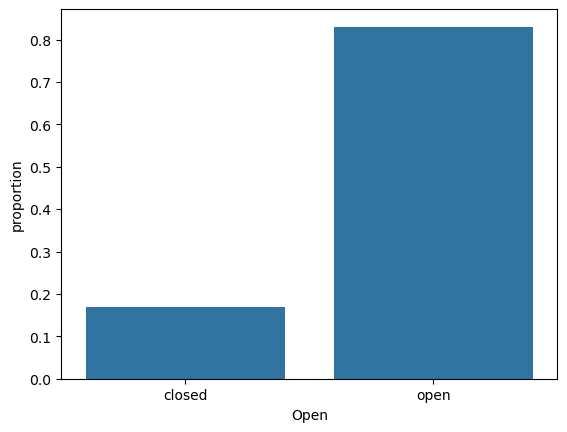

In [ ]:
print(df['Open'].value_counts('normalised'))
sns.barplot(df['Open'].value_counts('normalised'))
plt.xticks([0,1], ['closed', 'open'])
plt.show()

In [ ]:
#pickle.dump(<model_name>, open('model.pkl', 'wb'))
#loaded_model = pickle.load(open('model.pkl', 'rb'))